# Proyecto 1 Mineria de datos

Se analizara el contexto economico y politico para poder encontrar estrategias apropiadas para poder invertir en la salud global

### Se importan librerias

In [242]:
# Se importan librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

### Se leen los archivos

In [243]:
# Se carga el archivo de datos
expenditure = pd.read_csv('Expenditure.csv', encoding='latin1')
Personnel = pd.read_csv('Personnel.csv', encoding='latin1')
pib = pd.read_csv('PIB.csv', encoding='utf-8')

In [244]:
pib

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN,NaN
1,NaN,AFE,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,...,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12,NaN,NaN
2,Afganistán,AFG,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN,NaN,NaN
3,NaN,AFW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,...,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11,NaN,NaN
4,Angola,AGO,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.412034e+09,9.409474e+09,NaN,NaN
262,"Yemen, Rep. del",YEM,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN,NaN
263,Sudáfrica,ZAF,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,3.467098e+11,3.235855e+11,3.814488e+11,4.052607e+11,3.893300e+11,3.382914e+11,4.201178e+11,4.052709e+11,NaN,NaN
264,Zambia,ZMB,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.811064e+10,2.209642e+10,2.916378e+10,NaN,NaN


In [245]:
Personnel

,T10,Health personnel,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,4,Afghanistan,2001,Health personnel: Physicians (number),"4,104",NaN,"World Health Organisation (WHO), Geneva, WHO G..."
2,4,Afghanistan,2001,Health personnel: Physicians (per 1000 populat...,0.2,NaN,"World Health Organisation (WHO), Geneva, WHO G..."
3,4,Afghanistan,2001,Health personnel: Pharmacists (number),525,NaN,"World Health Organisation (WHO), Geneva, WHO G..."
4,4,Afghanistan,2001,Health personnel: Pharmacists (per 1000 popula...,0.0,NaN,"World Health Organisation (WHO), Geneva, WHO G..."
...,...,...,...,...,...,...,...
5880,716,Zimbabwe,2020,Health personnel: Dentists (per 1000 population),0.0,NaN,"World Health Organisation (WHO), Geneva, WHO G..."
5881,716,Zimbabwe,2020,Health personnel: Pharmacists (number),"1,600",NaN,"World Health Organisation (WHO), Geneva, WHO G..."
5882,716,Zimbabwe,2020,Health personnel: Pharmacists (per 1000 popula...,0.1,NaN,"World Health Organisation (WHO), Geneva, WHO G..."
5883,716,Zimbabwe,2020,Health personnel: Nurses and midwives (number),"31,792",NaN,"World Health Organisation (WHO), Geneva, WHO G..."


## Limpieza de datos

Primer paso
Se establecen los encabezados correctos en Personnel y expenditure

In [246]:
# Primer paso de limpieza de datos
# Hacer que la primera fila sea el encabezado
expenditure.columns = expenditure.iloc[0]
expenditure = expenditure[1:]

Personnel.columns = Personnel.iloc[0]
Personnel = Personnel[1:]


Segundo paso
Se cambia el nombre de la columna Nan por country name en Personnel y expenditure

In [247]:
# Segundo paso de limpieza de datos
# Cambiar el nombre de la segunda columna (La cual no tiene nombre y cuando la imprimo me muestra NaN) por Country
expenditure = expenditure.rename(columns={expenditure.columns[1]: 'Country Name'})
Personnel = Personnel.rename(columns={Personnel.columns[1]: 'Country Name'})
pib = pib.rename(columns={pib.columns[0]: 'Country Name'})
pib = pib.dropna(subset=['Country Name'])


Tercer paso de limpieza
Se preparan columnas number y per 1000 population en Personnel

In [248]:
# Remplazar parte de los valores de string en la columna Series
Personnel["Series"] = Personnel["Series"].str.replace("Health personnel: ", "")

#con regex extrae de forma unique los valores que estan entre parebtesis en series 
Series = Personnel["Series"].str.extract(r"\((.*?)\)", expand=False)

for serie in Series.unique():
    Personnel[serie] = 0
    Personnel.loc[Personnel["Series"].str.contains(serie), serie] = 1


Personnel['Series'] = Personnel['Series'].str.replace(' (per 1000 population)', '')
Personnel['Series'] = Personnel['Series'].str.replace(' (number)', '')

Cuarto Paso
Se corrigen los Values en base a su unidad en Personnel

In [249]:
# Convertir la columna "Value" a cadena antes de aplicar métodos .str
Personnel['Value'] = Personnel['Value'].astype(str)

# Aplicar los métodos .str para reemplazar los caracteres no deseados
Personnel['Value'] = Personnel['Value'].str.replace(',', '').str.replace(' ', '').str.replace('..', '0')

# Si number es 1, dividir value / 1000
Personnel["Value"] = Personnel["Value"].astype(float)
Personnel.loc[Personnel["number"] == 1, "Value"] = Personnel["Value"] / 1000


#eliminar categorias 
Personnel = Personnel.drop(columns=["per 1000 population", "number"])


Quinto paso
Se establece las categorias de profesion en Personnel

In [250]:
categorias = Personnel["Series"]
# Crear una lista para almacenar los elementos únicos
unique_elements = []

# Iterar sobre cada elemento único en la lista original
for i in categorias.unique():
    # Verificar si el elemento no contiene ninguna de las otras cadenas
    if not any(other in i for other in unique_elements):
        # Si no contiene ninguna de las otras cadenas, agregarlo a la lista de elementos únicos
        unique_elements.append(i)


for categoria in unique_elements:
    Personnel[categoria] = 0
    Personnel.loc[Personnel["Series"].str.contains(categoria), categoria] = 1

Personnel = Personnel.drop(columns=["Series"])
Personnel = Personnel.drop(columns=["Footnotes"])

Sexto paso
se unifican datos repetidos en Personnel

In [251]:
# Agrupar por las columnas mencionadas y sumar la columna 'Values'
Personnel = Personnel.groupby(['Country Name', 'Year', 'Source', 'Physicians', 'Pharmacists', 'Nurses and midwives', 'Dentists'])['Value'].sum().reset_index()

Septimo Paso
Se eliminan columnas consideradas innecesarias en Personnel

In [252]:
#eliminar columna source 
Personnel = Personnel.drop(columns=["Source"])

pib = pib.drop(columns=["Country Code"])
pib = pib.drop(columns=["Indicator Name"])
pib = pib.drop(columns=["Indicator Code"])  


Octavo paso
Se establece las unidades del value a trabajar para expenditure

In [253]:
#con regex extrae de forma unique los valores que estan entre parebtesis en series 
Series = expenditure["Series"].str.extract(r"\((.*?)\)", expand=False)


for serie in Series.unique():
    expenditure[serie] = 0
    expenditure.loc[expenditure["Series"].str.contains(serie), serie] = 1

#eliminar columna series 
expenditure = expenditure.drop(columns=["Series"])



Noveno paso
Se eliminan las columnas innecesarias

In [254]:
#eliminar footnotes y source 
expenditure = expenditure.drop(columns=["Footnotes"])
expenditure = expenditure.drop(columns=["Source"])


# cast de value a float en expenditure
expenditure['Value'] = expenditure['Value'].astype(float)


In [255]:
# hacer que las columnas de pib sean Country Name, year y Value
pib = pib.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")

# cast de value a float en pib
pib['Value'] = pib['Value'].astype(float)

# borrar todos los year que tengan Unnamed en su cadena
pib = pib[~pib['Year'].str.contains('Unnamed')]
pib['Year'] = pib['Year'].astype(int)


# borrar todos los datos que sean menores a 2001
pib = pib[pib['Year'] >= 2001]
pib['Year'] = pib['Year'].astype(str)

pib = pib.dropna(subset=['Value'])

Decimo paso
Se obtiene el dataframe final a trabajar

In [256]:
#Unificar tablas conforme region/country/area y year

# Unir los dos DataFrames
merged = pd.merge(expenditure, Personnel,on=['Country Name', 'Year'], how='inner')
merged = pd.merge(merged, pib, on=['Country Name', 'Year'], how='inner')

merged = merged.rename(columns={'Value_x': 'percent Expenditure', 'Value_y': 'Cant. People', 'Value': 'PIB'})
# nueva columna gasto en salud que tomaria el percent Expenditure/100 * PIB
merged['Gasto en Salud'] = merged['percent Expenditure'] * merged['PIB'] / 100


Decimo primer paso Liempieza directa de pib

#### Pesonnel Final

In [257]:
Personnel

,Country Name,Year,Physicians,Pharmacists,Nurses and midwives,Dentists,Value
0,Afghanistan,2001,0,1,0,0,0.525
1,Afghanistan,2001,1,0,0,0,4.304
2,Afghanistan,2005,0,0,1,0,15.530
3,Afghanistan,2005,0,1,0,0,0.900
4,Afghanistan,2008,0,0,0,1,0.382
...,...,...,...,...,...,...,...
2937,Zimbabwe,2015,1,0,0,0,2.708
2938,Zimbabwe,2020,0,0,0,1,0.234
2939,Zimbabwe,2020,0,0,1,0,33.792
2940,Zimbabwe,2020,0,1,0,0,1.700


#### expenditure final

In [258]:
expenditure

,Region/Country/Area,Country Name,Year,Value,% of GDP,% of total government expenditure
1,4,Afghanistan,2005,9.9,1,0
2,4,Afghanistan,2010,8.6,1,0
3,4,Afghanistan,2015,10.1,1,0
4,4,Afghanistan,2018,14.2,1,0
5,4,Afghanistan,2019,14.8,1,0
...,...,...,...,...,...,...
2258,716,Zimbabwe,2010,15.2,0,1
2259,716,Zimbabwe,2015,7.6,0,1
2260,716,Zimbabwe,2018,7.9,0,1
2261,716,Zimbabwe,2019,3.9,0,1


#### pib Final

In [259]:
pib

,Country Name,Year,Value
10824,Aruba,2001,1.896457e+09
10826,Angola,2001,8.936079e+09
10827,Albania,2001,3.922101e+09
10828,Andorra,2001,1.546912e+09
10829,El mundo árabe,2001,8.032260e+11
...,...,...,...
16626,Samoa,2022,8.329452e+08
16627,Kosovo,2022,9.409474e+09
16629,Sudáfrica,2022,4.052709e+11
16630,Zambia,2022,2.916378e+10


#### Merged final

In [260]:
merged

,Region/Country/Area,Country Name,Year,percent Expenditure,% of GDP,% of total government expenditure,Physicians,Pharmacists,Nurses and midwives,Dentists,Cant. People,PIB,Gasto en Salud
0,8,Albania,2005,5.8,1,0,0,0,1,0,14.836,8.052077e+09,4.670205e+08
1,8,Albania,2010,6.2,1,0,0,0,1,0,15.946,1.192693e+10,7.394695e+08
2,8,Albania,2010,6.2,1,0,0,1,0,0,1.824,1.192693e+10,7.394695e+08
3,8,Albania,2010,6.2,1,0,1,0,0,0,4.840,1.192693e+10,7.394695e+08
4,8,Albania,2005,9.2,0,1,0,0,1,0,14.836,8.052077e+09,7.407911e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,716,Zimbabwe,2015,7.6,0,1,1,0,0,0,2.708,1.996312e+10,1.517197e+09
1337,716,Zimbabwe,2020,5.2,0,1,0,0,0,1,0.234,2.150970e+10,1.118504e+09
1338,716,Zimbabwe,2020,5.2,0,1,0,0,1,0,33.792,2.150970e+10,1.118504e+09
1339,716,Zimbabwe,2020,5.2,0,1,0,1,0,0,1.700,2.150970e+10,1.118504e+09


## Analisis exploratorio

#### Tipos de datos

In [261]:
# dtypes de los dataframes
print("-----------Expenditure-----------")
print(expenditure.dtypes)
print("-----------Personnel-----------")
print(Personnel.dtypes)
print("-----------PIB-----------")
print(pib.dtypes)
print("-----------Merged-----------")
print(merged.dtypes.head(15))

-----------Expenditure-----------
0
Region/Country/Area                   object
Country Name                          object
Year                                  object
Value                                float64
% of GDP                               int64
% of total government expenditure      int64
dtype: object
-----------Personnel-----------
Country Name            object
Year                    object
Physicians               int64
Pharmacists              int64
Nurses and midwives      int64
Dentists                 int64
Value                  float64
dtype: object
-----------PIB-----------
Country Name     object
Year             object
Value           float64
dtype: object
-----------Merged-----------
Region/Country/Area                   object
Country Name                          object
Year                                  object
percent Expenditure                  float64
% of GDP                               int64
% of total government expenditure      int64
Physic

#### Informacion general de Merged

In [262]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Region/Country/Area                1341 non-null   object 
 1   Country Name                       1341 non-null   object 
 2   Year                               1341 non-null   object 
 3   percent Expenditure                1341 non-null   float64
 4   % of GDP                           1341 non-null   int64  
 5   % of total government expenditure  1341 non-null   int64  
 6   Physicians                         1341 non-null   int64  
 7   Pharmacists                        1341 non-null   int64  
 8   Nurses and midwives                1341 non-null   int64  
 9   Dentists                           1341 non-null   int64  
 10  Cant. People                       1341 non-null   float64
 11  PIB                                1341 non-null   float

#### Resumen estadistico

In [263]:
merged.describe()

,percent Expenditure,% of GDP,% of total government expenditure,Physicians,Pharmacists,Nurses and midwives,Dentists,Cant. People,PIB,Gasto en Salud
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1.341000e+03,1.341000e+03
mean,8.031618,0.498136,0.501864,0.277405,0.202088,0.293065,0.227442,59.881056,2.444065e+11,1.874948e+10
std,4.311250,0.500183,0.500183,0.447885,0.401707,0.455338,0.419337,330.891776,1.194922e+12,8.799844e+10
min,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,4.756284e+07,4.851410e+06
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.747000,5.110250e+09,3.103270e+08
50%,7.100000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.622000,1.426241e+10,1.106572e+09
75%,10.200000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,16.753000,9.220298e+10,5.703540e+09
max,31.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4712.017000,1.468774e+13,1.233771e+12


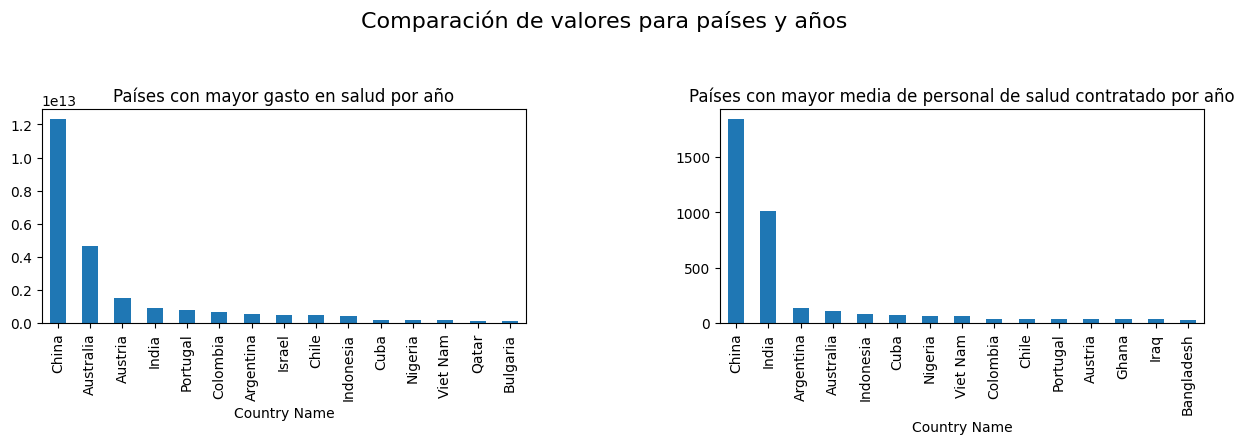

In [264]:
plt.figure(figsize=(15, 10))

# Primera figura: Países con mayor gasto en salud y personal de salud contratado
plt.subplot(3, 2, 1)
merged.groupby('Country Name')['Gasto en Salud'].sum().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Países con mayor gasto en salud por año')

plt.subplot(3, 2, 2)
merged.groupby('Country Name')['Cant. People'].mean().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Países con mayor media de personal de salud contratado por año')


# Título general y ajustes
plt.suptitle('Comparación de valores para países y años', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.4)

plt.show()

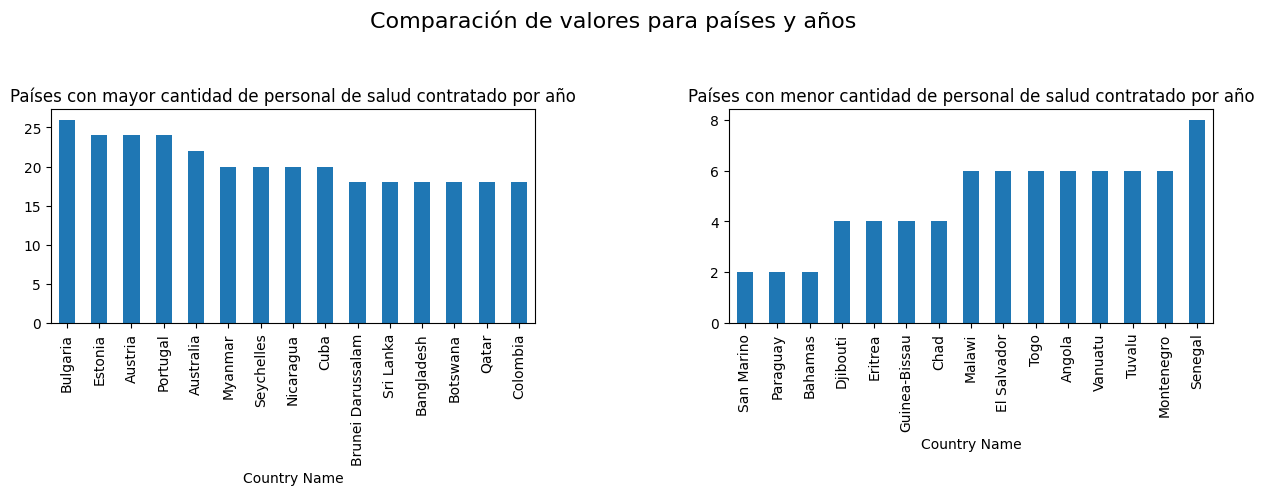

In [265]:
plt.figure(figsize=(15, 10))

# Segunda figura: Países con mayor y menor cantidad de personal de salud contratado
plt.subplot(3, 2, 1)
merged.groupby('Country Name')[['Physicians', 'Nurses and midwives', 'Dentists']].sum().sum(axis=1).sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Países con mayor cantidad de personal de salud contratado por año')

plt.subplot(3, 2, 2)
merged.groupby('Country Name')[['Physicians', 'Nurses and midwives', 'Dentists']].sum().sum(axis=1).sort_values(ascending=True).head(15).plot(kind='bar')
plt.title('Países con menor cantidad de personal de salud contratado por año')

plt.suptitle('Comparación de valores para países y años', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.4)

plt.show()


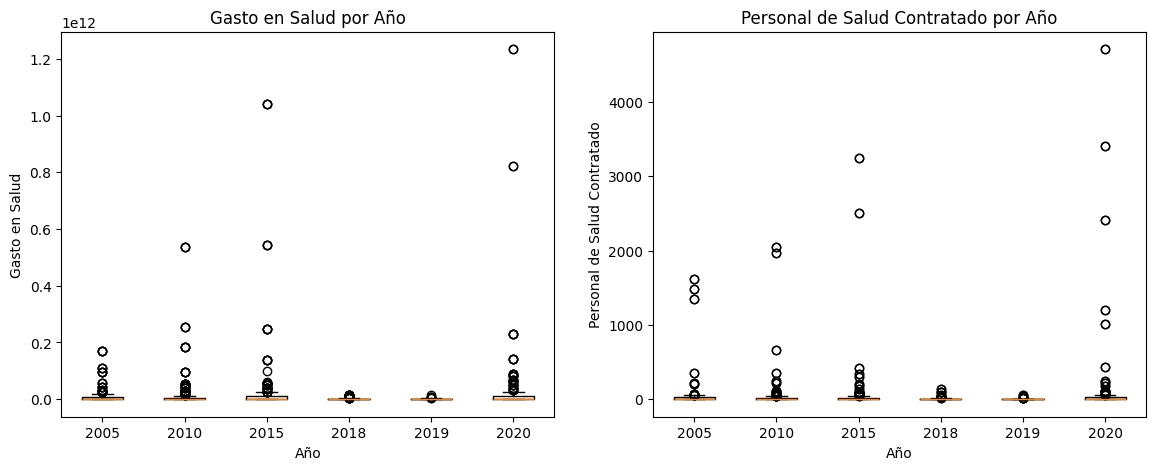

In [266]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.boxplot([merged[merged['Year'] == year]['Gasto en Salud'] for year in sorted(merged['Year'].unique())], 
            labels=sorted(merged['Year'].unique()))
plt.title('Gasto en Salud por Año')
plt.xlabel('Año')
plt.ylabel('Gasto en Salud')

plt.subplot(1, 2, 2)
plt.boxplot([merged[merged['Year'] == year]['Cant. People'] for year in sorted(merged['Year'].unique())], 
            labels=sorted(merged['Year'].unique()))
plt.title('Personal de Salud Contratado por Año')
plt.xlabel('Año')
plt.ylabel('Personal de Salud Contratado')

plt.show()

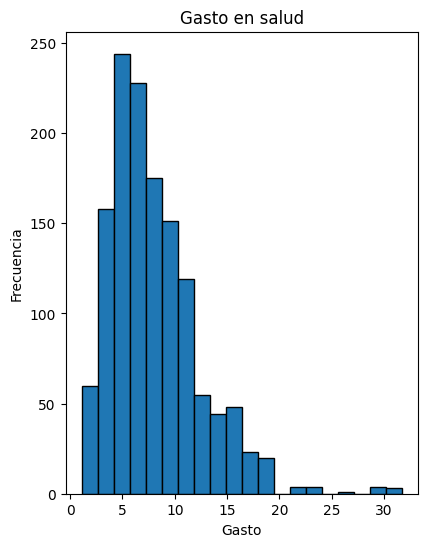

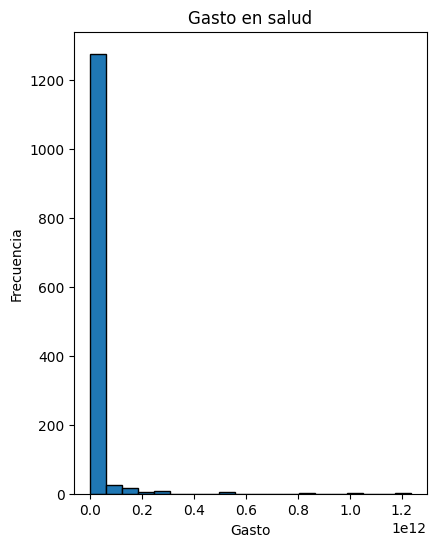

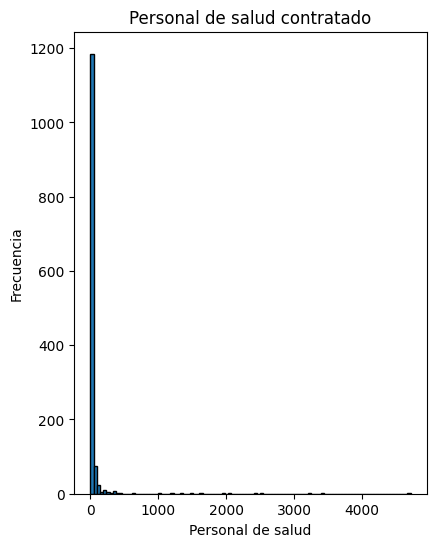

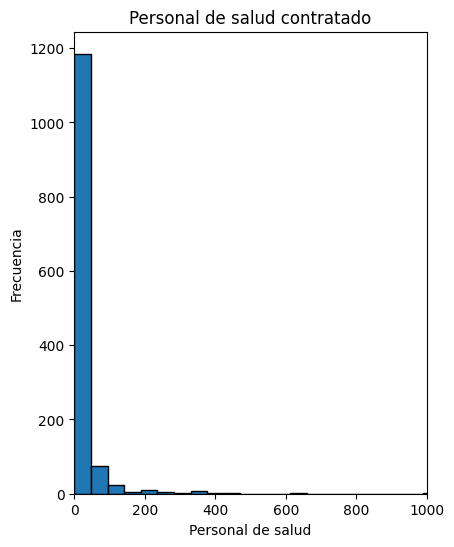

In [267]:
# Histograma para la variable 'Value_x'
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(merged['percent Expenditure'], bins=20, edgecolor='black')
plt.title('Gasto en salud')
plt.xlabel('Gasto')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para la variable 'Gasto en salud'
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(merged['Gasto en Salud'], bins=20, edgecolor='black')
plt.title('Gasto en salud')
plt.xlabel('Gasto')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para la variable 'Value_y'
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.hist(merged['Cant. People'], bins=100, edgecolor='black')
plt.title('Personal de salud contratado')
plt.xlabel('Personal de salud')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.hist(merged['Cant. People'], bins=100, edgecolor='black')
plt.title('Personal de salud contratado')
plt.xlabel('Personal de salud')
plt.ylabel('Frecuencia')
plt.xlim(0, 1000)
plt.show()

#### Analisis de correlación

In [268]:
# generar analisis de correlacion
datos_num = merged.select_dtypes(include=[float, int])
correlacion = datos_num.corr()

correlacion


,percent Expenditure,% of GDP,% of total government expenditure,Physicians,Pharmacists,Nurses and midwives,Dentists,Cant. People,PIB,Gasto en Salud
percent Expenditure,1.000000,-0.379714,0.379714,-0.000642,-0.016490,0.003183,0.013026,-0.049699,-0.017101,0.077628
% of GDP,-0.379714,1.000000,-1.000000,-0.001021,0.000019,0.000762,0.000244,0.000570,0.000716,-0.054421
% of total government expenditure,0.379714,-1.000000,1.000000,0.001021,-0.000019,-0.000762,-0.000244,-0.000570,-0.000716,0.054421
Physicians,-0.000642,-0.001021,0.001021,1.000000,-0.311819,-0.398935,-0.336186,0.027425,0.020838,0.021366
Pharmacists,-0.016490,0.000019,-0.000019,-0.311819,1.000000,-0.324030,-0.273063,-0.052059,0.014516,0.013910
Nurses and midwives,0.003183,0.000762,-0.000762,-0.398935,-0.324030,1.000000,-0.349351,0.100583,0.013586,0.011776
Dentists,0.013026,0.000244,-0.000244,-0.336186,-0.273063,-0.349351,1.000000,-0.088640,-0.050916,-0.048932
Cant. People,-0.049699,0.000570,-0.000570,0.027425,-0.052059,0.100583,-0.088640,1.000000,0.872883,0.798299
PIB,-0.017101,0.000716,-0.000716,0.020838,0.014516,0.013586,-0.050916,0.872883,1.000000,0.946980
Gasto en Salud,0.077628,-0.054421,0.054421,0.021366,0.013910,0.011776,-0.048932,0.798299,0.946980,1.000000


#### Grafica de correlación

<Figure size 1000x600 with 0 Axes>

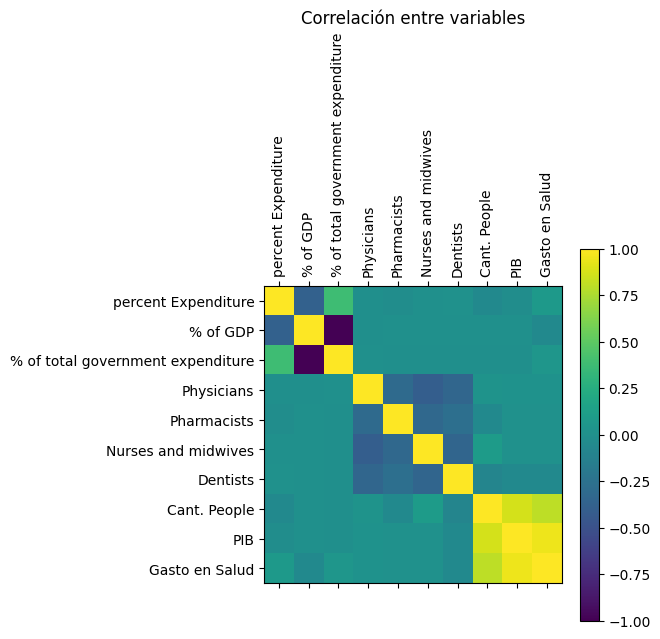

In [269]:
# Grafico de correlacion
plt.figure(figsize=(10, 6))
plt.matshow(correlacion, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(correlacion.columns)), correlacion.columns, rotation=90)
plt.yticks(range(len(correlacion.columns)), correlacion.columns)
plt.title('Correlación entre variables')
plt.show()

#### Variables categoricas

#### Tabla de frecuencia

In [270]:
# tabla de frecuencia
data_cat = merged.select_dtypes(include=[object])
tabla_frecuencia = data_cat["Country Name"].value_counts()

tabla_frecuencia

Country Name
Estonia          32
Portugal         32
Austria          32
Bulgaria         30
Australia        30
                 ..
Guinea-Bissau     4
Eritrea           4
Bahamas           2
Paraguay          2
San Marino        2
Name: count, Length: 82, dtype: int64

#### Tabla de proporción

In [271]:
# Tabla de proporción
tabla_proporcion = data_cat["Country Name"].value_counts(normalize=True)

tabla_proporcion

Country Name
Estonia          0.023863
Portugal         0.023863
Austria          0.023863
Bulgaria         0.022371
Australia        0.022371
                   ...   
Guinea-Bissau    0.002983
Eritrea          0.002983
Bahamas          0.001491
Paraguay         0.001491
San Marino       0.001491
Name: proportion, Length: 82, dtype: float64

#### Clustering

In [272]:
merged

,Region/Country/Area,Country Name,Year,percent Expenditure,% of GDP,% of total government expenditure,Physicians,Pharmacists,Nurses and midwives,Dentists,Cant. People,PIB,Gasto en Salud
0,8,Albania,2005,5.8,1,0,0,0,1,0,14.836,8.052077e+09,4.670205e+08
1,8,Albania,2010,6.2,1,0,0,0,1,0,15.946,1.192693e+10,7.394695e+08
2,8,Albania,2010,6.2,1,0,0,1,0,0,1.824,1.192693e+10,7.394695e+08
3,8,Albania,2010,6.2,1,0,1,0,0,0,4.840,1.192693e+10,7.394695e+08
4,8,Albania,2005,9.2,0,1,0,0,1,0,14.836,8.052077e+09,7.407911e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,716,Zimbabwe,2015,7.6,0,1,1,0,0,0,2.708,1.996312e+10,1.517197e+09
1337,716,Zimbabwe,2020,5.2,0,1,0,0,0,1,0.234,2.150970e+10,1.118504e+09
1338,716,Zimbabwe,2020,5.2,0,1,0,0,1,0,33.792,2.150970e+10,1.118504e+09
1339,716,Zimbabwe,2020,5.2,0,1,0,1,0,0,1.700,2.150970e+10,1.118504e+09


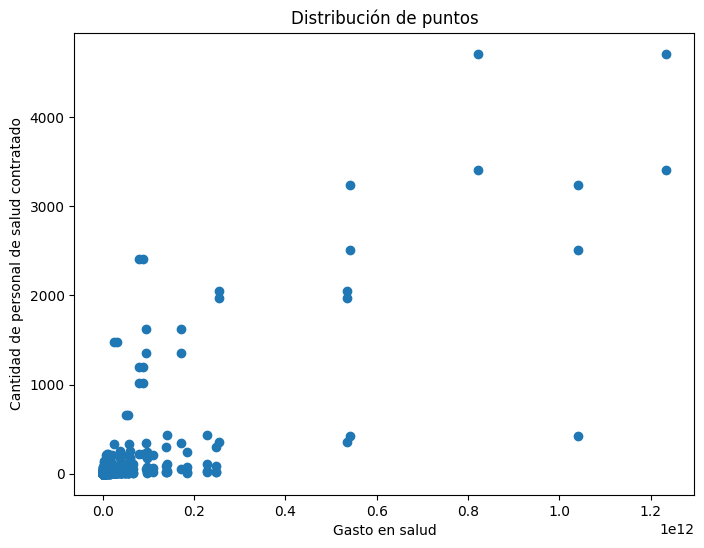

In [273]:
plt.figure(figsize=(8, 6))
plt.scatter(merged["Gasto en Salud"], merged['Cant. People'])
plt.xlabel('Gasto en salud')
plt.ylabel('Cantidad de personal de salud contratado')
plt.title('Distribución de puntos')
plt.show()

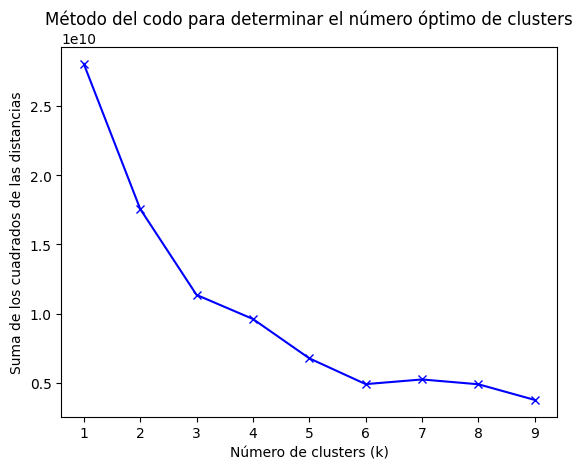

cluster
0    1285
2      43
1       7
3       6
Name: count, dtype: int64

In [275]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(merged[['Gasto en Salud', 'Cant. People']])
    distortions.append(sum(np.min(cdist(merged[['Gasto en Salud', 'Cant. People']], kmeans.cluster_centers_, 'euclidean'), axis=1)) / merged.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de los cuadrados de las distancias')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()
kmeans = KMeans(n_clusters=4)
kmeans.fit(merged[['Gasto en Salud', 'Cant. People']])
merged['cluster'] = kmeans.predict(merged[['Gasto en Salud', 'Cant. People']])
merged['cluster'].value_counts()


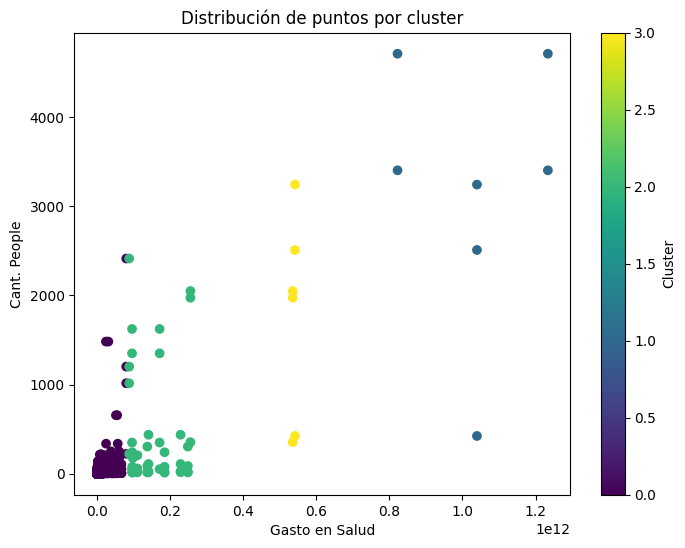

In [276]:

plt.figure(figsize=(8, 6))
plt.scatter(merged['Gasto en Salud'], merged['Cant. People'], c=merged['cluster'])
plt.xlabel('Gasto en Salud')
plt.ylabel('Cant. People')
plt.title('Distribución de puntos por cluster')
plt.colorbar(label='Cluster')
plt.show()
